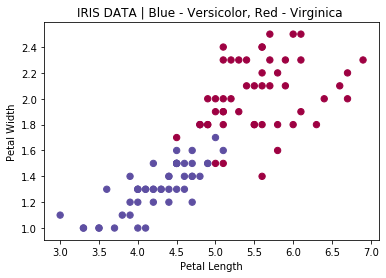

Cost after iteration 0: 0.693225
Cost after iteration 1000: 0.313813
Cost after iteration 2000: 0.185275
Cost after iteration 3000: 0.187305
Cost after iteration 4000: 0.112187
Cost after iteration 5000: 0.090343
Cost after iteration 6000: 0.111365
Cost after iteration 7000: 0.075384
Cost after iteration 8000: 0.071151
Cost after iteration 9000: 0.071377


'def plot_decision_boundary(model, X, y):\n   \n    x_min, x_max = X[0, :].min() - 0.25, X[0, :].max() + 0.25\n    y_min, y_max = X[1, :].min() - 0.25, X[1, :].max() + 0.25\n    h = 0.01\n\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))\n    # Predict the function value for the whole grid\n    Z = model(np.c_[xx.ravel(), yy.ravel()])\n    Z = Z.reshape(xx.shape)\n\n    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)\n    plt.ylabel(\'x2\')\n    plt.xlabel(\'x1\')\n    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)\nplot_decision_boundary(lambda x: predict(parameters, X.T), X, Y[0,:])\nplt.title("Decision Boundary for hidden layer size " + str(6))\n#plt.plot(X,Y,label=\'Decision Boundary\')\nplt.xlabel(\'Petal Length\')\nplt.ylabel(\'Petal Width\')'

In [19]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model



iris = pd.read_csv('iris_csv.csv')
iris.loc[iris['class']=='Iris-virginica','species']=0
iris.loc[iris['class']=='Iris-versicolor','species']=1
iris.loc[iris['class']=='Iris-setosa','species'] = 2
iris = iris[iris['species']!=2]#Create Input and Output columns
X = iris[['petallength', 'petalwidth']].values.T
Y = iris[['species']].values.T
Y = Y.astype('uint8')
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);
plt.title("IRIS DATA | Blue - Versicolor, Red - Virginica ")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2) 
    
    W1 = np.random.randn(n_h, n_x) * 0.01 
    b1 = np.zeros(shape=(n_h, 1))  
    W2 = np.random.randn(n_y, n_h) * 0.01   
    b2 = np.zeros(shape=(n_y, 1))  
      
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
def layer_sizes(X, Y):    
    n_x = X.shape[0] 
    n_h = 6
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)


def forward_propagation(X, parameters):  
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)  
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1+np.exp(-Z2))  
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

def compute_cost(A2, Y, parameters):
   
    m = Y.shape[1] 
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    return cost

def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
   
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):    
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
 
        grads = backward_propagation(parameters, cache, X, Y)
 
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    return parameters,n_h
parameters = nn_model(X,Y , n_h = 6, num_iterations=10000, print_cost=True)
'''def plot_decision_boundary(model, X, y):
   
    x_min, x_max = X[0, :].min() - 0.25, X[0, :].max() + 0.25
    y_min, y_max = X[1, :].min() - 0.25, X[1, :].max() + 0.25
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
plot_decision_boundary(lambda x: predict(parameters, X.T), X, Y[0,:])
plt.title("Decision Boundary for hidden layer size " + str(6))
#plt.plot(X,Y,label='Decision Boundary')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')'''
            